<a href="https://colab.research.google.com/github/Manikrishnagadi/Netflix-movies-and-tv-shows-clustering-unsupervised/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This is an Unsupervised Machine learning project in this project I will have to build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


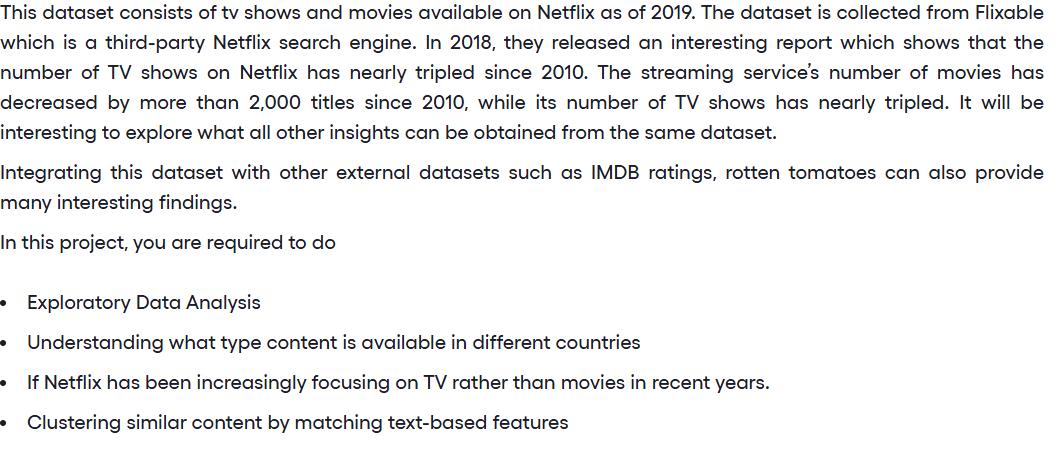My Task is to make a Model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
df= pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

In the dataset there are 7787 row and 12 column. Director column has highest number of missing value.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

**show_id:** Unique identifier for each movie/show.

**type:** Indicates whether the entry is a movie or a TV show.

**title:** Name of the movie or TV show.

**director:** Name of the director(s) of the movie or TV show.

**cast:** Names of the actors and actresses featured in the movie or TV show.

**country:** Country or countries where the movie or TV show was produced.

**date_added:** Date when the movie or TV show was added to Netflix.

**release_year:** Year when the movie or TV show was released.

**rating:** TV rating or movie rating of the movie or TV show.

**duration:** Length of the movie or TV show in minutes or seasons.

**listed_in:** Categories or genres of the movie or TV show.

**description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

In [ ]:
# Unique values for each variable
for col in df.columns:
  print('Unique values for ',col,'are \n',df[col].unique(),'\n')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
      ''' init method '''
      try:
          self.df = df.copy()
          self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
          self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
          self.cast_ = self.get_cast_or_listed_in('cast')
          self.genres_ = self.get_cast_or_listed_in('listed_in')
          self.directors_ = self.getTopValues('director')
          self.countries_ = self.getTopValues('country')
          self.release_years_ = self.getTopValues('release_year')
          self.ratings_ = self.getTopValues('rating')
          self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))

      except:
          print('Invalid input!')
    # Function to get dataset
    def get_df(self):
      ''' Function returns dataframe '''
      return self.df
    # Function to get movies dataset
    def getMovies(self):
      ''' Function returns returns dataframe which contains data of movies '''
      return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
      ''' Function returns dataframe which contains data of tv shows '''
      return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
      ''' Function returns top values for the given column '''
      try:
          return self.df[col].value_counts().sort_values(ascending=False)
      except:
          return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      ''' Function for setting duration values '''
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]

    # Function to set duration unit
    def set_duration_unit(self,duration):
      ''' function for setting duration unit. '''
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'

    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
             # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)

    # Function for converting duration_value into int type
    def convertInt(self,col):
      ''' Function to convert other type into integer '''
      return int(col)

    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
      ''' Function which returns Shows per month '''
      df = pd.DataFrame()
      if typ == 'tv':
          df = self.getTvShows()
      elif typ == 'movie':
          df = self.getMovies()
      else:
          df = self.df.copy()
      df = df[df['date_added'].isna() == False]
      df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
      monthly_shows = df['added_month'].value_counts()
      return monthly_shows

    # Get Text Length
    def getTextLength(self,text):
      return len(text)
    # Get Dataframe with length column
    def getDfWithLength(self,col):
      df = self.df.copy()
      df['text_length'] = df[col].apply(self.getTextLength)
      return df

# Initializing the object
netflixWrangling = NetflixWrangling(df)

In [ ]:
df["type"].value_counts()

In [ ]:
# top count of show from top ten country
df["country"].value_counts().head(10)

In [ ]:
# Printing the shapes for each type of shows
print('Data for Movies has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for TV shows has shape :',netflixWrangling.getTvShows().shape)
print('')

In [ ]:
# Total length for each type of durations
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

In [ ]:
# Total number of Shows for each month
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

In [ ]:
# Total number of Movies for each month
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

In [ ]:
# Total number of TV Shows for each month
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

In [ ]:
# Assigning top 5 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

In [ ]:
# Top 5 directors with highest number of shows
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

In [ ]:
# Top 5 countries with highest number of shows
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

In [ ]:
# Top 5 years with highest number of shows released
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

In [ ]:
# Top ratings with highest number of shows
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

In [ ]:
# Top 5 Genres with highest number of Movies/TV Shows
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

In [ ]:
# Top 10 directors with highest length of descriptions
print('Top 10 Directors with highest length of descriptions')
netflixWrangling.getDfWithLength('description').groupby('director')['text_length'].mean().sort_values(ascending=False).reset_index().head(10)


### What all manipulations have you done and insights you found?


1. First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.

2. Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18

3. Top 5 countries produced highest number of movies are :

United States : 2555 India : 923 United Kingdom : 397 Japan : 226 South Korea : 183

4. Highest movies produced in year 2018 : 1121

5. Rating for highest number of movie is TV-MA : 2863

6. Top 5 actors with highest number of movies are :

Anupam Kher : 42 Shah Rukh Khan : 35 Naseeruddin Shah : 30 Om Puri : 30 Akshay Kumar : 29

7. Top genres with highest number of movies are :
International Movies : 2437 Dramas : 2106

8. Total Seasons : 4280 and Total Minutes : 533979.

9. Number of TV Shows/Movies for each month

December : 833

October : 785

January : 757

November : 738

March : 669

September : 619

August : 618

April : 601

July : 600

May : 543

June : 542

February : 472

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Class for visualization
class NetflixVisualization(NetflixWrangling):
    bar_colors = ['violet','indigo','blue','g','yellow','orange','r']
    # Init method
    def __init__(self,df):
      ''' Init method '''
      self.df = df
      self.df_tv = df[df['type'] == 'Tv_shows']

    # Bar chart for value counts
    def countBar(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column'''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.bar(color=self.bar_colors,figsize=(15,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.show()
      except:
        print('Invalid Input...')

    # Barh chart for value counts
    def countBarh(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column '''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.barh(color=self.bar_colors,figsize=(13,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel('counts')
        plt.ylabel(col)
        plt.show()
      except:
        print('Invalid Input...')

    # Chart 1 - Function shows contents counts for each type
    def chart_1(self):
      ''' Function shows contents counts for each type  '''
      self.df['type'].value_counts().plot.pie(figsize=(7,7),
                                                  colors={'cyan','coral'},
                                                  shadow=True,explode=[0.03,0.03],
                                                  autopct='%0.01f%%')
      plt.show()

    # Chart 2 - Bar chart shows top countries with highest number of shows
    def chart_2(self,typ='default',top=10):
      ''' Function shows top countries with highest number of shows '''
      self.countBar('country',typ,top)


    # Chart 3 - Bar chart,directors for TV shows
    def chart_3(self,typ='default',top=10):
      ''' Function shows top directors with highest number of shows '''
      self.countBar('director',typ,top)


    # chart 4 - Function shows top release with highest number of shows
    def chart_4(self,typ='default',top=10):
      ''' Function shows top release year with highest number of shows '''
      self.countBar('release_year',typ,top)

     # Chart 5 - shows top ratings with highest number of shows
    def chart_5(self,typ='default',top=10):
      ''' Function shows top ratings with highest number of shows '''
      if typ == 'movie':
        plt.xticks(np.arange(0,1851,100))
        self.countBarh('rating',typ,top)
      else:
        plt.yticks(np.arange(0,1201,100))
        self.countBar('rating',typ,top)


    # Chart 6- shows top listed in with highest number of shows
    def chart_6(self,typ='default',top=10):
      ''' Function shows top listed_in with highest number of shows '''
      plt.xticks(np.arange(0,400,10))
      self.countBarh('listed_in',typ,top)
    # Method to get top  values for the given column
    def getTopBarh(self,col):
      ''' Function shows top 5 values for a given column '''
      x = self.get_cast_or_listed_in(col).head()
      x.plot.barh(color= self.bar_colors)
      plt.title('Top 5 '+col)
      plt.xlabel('count of movies/tv shows')
      plt.ylabel(col)
      plt.show()

# Initializing the object
netflixVisualization = NetflixVisualization(df)


#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# value counts for each type
netflixVisualization.chart_1()


##### 1. Why did you pick the specific chart?

Pie chart expresses part to whole relationship with the data so I picked this chart to see percentage of TV shows and movies the in dataset.

##### 2. What is/are the insight(s) found from the chart?

I found that there are 69.1% movies and 30.9% TV Shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, percentage of movies are more the double of TV Shows. In movie industries competition is more than double.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#Top 10 countries with highest number of shows
netflixVisualization.chart_2()

##### 1. Why did you pick the specific chart?

A bar chart show value counts or frequency of the data for different columns and I picked this chart to see which are top 10 countries producing highest number of movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

I found that United State is producing highest number of movies that is more than 2500 movies then India is 2nd highest about 1000 after that United Kingdom producting about 500 movies/TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, most of the movies are producing in USA and India they can sell good movies in competitive price to netflix.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Top 10 directors with highest number of TV shows
netflixVisualization.chart_3('tv')

In [ ]:
# Top 10 directors with highest number of Movies
netflixVisualization.chart_3('movie')

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top directors with highest number of TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

Top 10 Directors for TV Shows. Alastair Fothergill : 3 TV shows.

Ken Burns : 2 TV Shows.

Shin Won-ho : 2 TV Shows.

Iginio Straffi : 2 TV Shows.

Rob Seidenglanz : 2 TV Shows.

Stan Lathan : 2 TV Shows.

Rest of them produced only 1 TV show.

Top 10 Directors for Movies.

Raúl Campos and Jan Suter : 18 movies.

Marcus Raboy : 15 movies.

Jay Karas : 14 movies.

Cathy Garcia-Molina : 13 movies.

Youssef Chahine : 12 movies.

Jay Chapman : 12 Movies.

Martin Scorsese : 12 Movies.

Steven Spielberg : 10 Movies.

David Dhawan : 9 Movies.

Johnnie To : 8

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Maximum 3 TV Shows are produced by 1 director in other side maximum number of movies are 18 that is 6 times greater than TV shows. Movies are more in demand than TV shows becacuse most of the movies shows the ending part quickly and on other hand it takes much time to finish the TV shows completly.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#Top 5 release year with highest number of Movies
netflixVisualization.chart_4('movie',top=5)

In [ ]:
#Top 5 release year with highest number of TV shows
netflixVisualization.chart_4('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see nomber of shows for each year.

##### 2. What is/are the insight(s) found from the chart?

Number of Movies released in each year:

2017 : 744

2018 : 734

2016 : 642

2019 : 582

2020 : 411

Number of TV Shows released in each year:

2020 : 457

2019 : 414

2018 : 387

2017 : 268

2016 : 240

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highest number of movies released in the year 2017 and TV shows in 2020. The reason behind this is that TV shows are relatively small and movies takes much time when shooting. Since they shoots TV shows easily in advance therefore the number of TV Shows are higher in 2020 and movies are less because of corona virus.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Top 5 rating with highest number of Movies
netflixVisualization.chart_5('movie',top=5)

In [ ]:
# Top 5 rating with highest number of TV Shows
netflixVisualization.chart_5('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of ratings.

##### 2. What is/are the insight(s) found from the chart?

Number of Movies for top 5 ratings:

TV-MA : 1845

TV-14 : 1272

R : 663

TV-PG : 505

PG-13 : 386

Numbere of TV Shows for top 5 ratings:

TV-MA : 1018

TV-14 : 659

TV-PG : 301

TV-Y7 : 176

TV-Y : 163

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insight will help while making prediction.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Top 5 genres with highest number of shows
plt.xticks(np.arange(0,2601,200))
netflixVisualization.getTopBarh('listed_in')

In [ ]:
#Top 5 Listed_in with highest number of Movies
netflixVisualization.chart_6('movie',top=5)

In [ ]:
# Top 5 Listed_in with highest number of TV shows
netflixVisualization.chart_6('tv',top=5)

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of genres.

##### 2. What is/are the insight(s) found from the chart?

Top 10 genres with highest number of movies/tv shows.

International Movies : 2437

Dramas : 2106

Comedies : 1471

International TV Shows : 1199

Documentaries : 786

Genres with highest number of movies :

Documentaries : 334

Stand-Up Comedy : 321

Dramas, International Movies : 320

Comedies, Dramas, International Movies : 243

Dramas, Independent Movies, International Movies : 215

Genres with highest number of TV Shows:

Kids' TV : 205

International TV Shows, TV Dramas : 111

Crime TV Shows, International TV Shows, TV Dramas : 106

Kids' TV, TV Comedies : 90

International TV Shows, Romantic TV Shows, TV Dramas : 86

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight will help while making the prediction.

Documentaries, Stand-up comedies, dramas, international movies, comedies and independent the genres which highest number of movies are being produced. Therefore these we can say that consumers mostly likes this kind of movies. 2. Kids TV, International TV shows, TV dramas, Crime tv shows, Romantic TV shows are the genres which are being produced in highest quantity.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#Top 5 Actors with highest number of shows
plt.xticks(np.arange(0,43,1))
netflixVisualization.getTopBarh('cast')

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top 10 actors with highest number of movies/tv show.

##### 2. What is/are the insight(s) found from the chart?

I found that Anupam Kher worked in about 42 movies which is highest then Shahrukh Khan worked in about 37 movies that is 2nd highest, OM Puri, Nasisuddin Shah, Takahiro Sakurai, Akshay Kumar, Paresh Rawal, Yuki Kaji, Boman Irani and Amitabh Bachchan are from 3rd highest to 10 respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight will help while making the prediction. These are the top actors consumers likes to watch them and their movies mostly break the records and earns high profits.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
netflixWrangling.getShowsPerMonth().plot.barh(figsize=(12,4),color=netflixVisualization.bar_colors)
plt.title('Monthly Show count')
plt.xlabel('Counts')
plt.ylabel('Months')
plt.xticks(np.arange(0,851,50))
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each column therefore I picked this chart to see counts of shows for each month.

##### 2. What is/are the insight(s) found from the chart?

I found that october, november, december and january have more than 700 highest number of movies are produced but every month there are more than 400 movies or TV Shows are being produced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the movies are get produced during winter season.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_copy = df.copy()
df_copy['cast'] = df_copy['cast'].fillna('unknown cast')
df_copy['country'] = df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy = df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I replace nan with unknown cast and unknown country for columns cast and country. Then I dropped those rows which has less than or uqual to 10 nan values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def displayOutliers():
  ''' This function display outliers '''
  sns.boxplot(df_copy['release_year'])
  plt.xticks(np.arange(1920,2031,10))
  plt.show()

# Function for outlier treatment
def treatOutliers(df_copy):
  ''' Function takes dataset and returns a dataset after treating the outliers '''
  q1 = df_copy['release_year'].quantile(.25)
  q3 = df_copy['release_year'].quantile(.75)
  iqr = q3-q1
  lower = q1-1.5*(iqr)
  df_copy = df_copy[df_copy['release_year'] > lower]
  return df_copy

# Treating the outlier by applying the above function
print('Before outlier treatment')
displayOutliers()
for i in range(2):
    print('After iteration '+str(i+1))
    df_copy=treatOutliers(df_copy)
    displayOutliers()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used q1-1.5iqr technique to remove uni-variate outliers because the column release_year had outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x=='Movie' else 1)
df_copy.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is not biased to a particular variable therefore I did one hot encoding of column type and created new columns movie and tv_show.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Combining the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Function to convert in lower case
def lower_casing(text):
  ''' function takes string and conver it to lower case '''
  list_of_words = [letter.lower() for letter in text.split()]
  return ' '.join(list_of_words)

df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def rem_punctuation(text):
  '''
  takes text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])

# Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def removeDigits(text):
  '''
  takes text and removes digits
  '''
  nums = ['0','1','2','3','4','5','6','7','8','9']
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeDigits)

# Function to remove url
def removeUrls(text):
  '''
  Takes a texts and removes url
  '''
  return ' '.join([t for t in text.split('.') if t not in ['com','www','https//']])

# Remove URLs & Remove words and digits contain digits
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeUrls)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
nltk.download('stopwords')
# Function to remove stop words
def removeStopWords(text):
  '''
  Takes text and removes stop words
  '''
  stopwords_ = nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords_])

# Remove Stopwords
print('Length before removing stopwords ',len(df_copy['cluster_col'][0]))
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeStopWords)
print('Length after removing stopwords ',len(df_copy['cluster_col'][0]))

In [ ]:
# Remove White spaces
def removeWhiteSpace(text):
  '''
  takes text and removes white spaces
  '''
  return ' '.join([t for t in text.split(' ')])
# Remove White spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeWhiteSpace)


#### 7. Tokenization

In [ ]:
# Tokenization
# Vectorization Function
def getVectorized(df):
  ''' Function takes dataset and apply vectorization '''
  count_vectorizer = CountVectorizer()
  # Fitting the count vectorizer
  count_vectorizer.fit_transform(df['cluster_col'])
  # Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()

# Applying the  above function and showing the features
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

In [ ]:
# Total features
print('Total Features ',len(dictionary_cluster_col))

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming finction
def stemming(text):
  ''' Takes text and returns after stemming. '''
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

# Function to assign words and counts from dictionary to list
def assignWordsAndCountsToList(dictionary):
  ''' Takes dictionary and return list of words and counts. '''
  vocab_cluster = [ ]
  vocab_counts_cluster = []
  for key , value in dictionary:
    vocab_cluster.append( key )
    vocab_counts_cluster.append( value )
  return vocab_cluster,vocab_counts_cluster

# Function to display word count
def displayTop20Words(df):
  '''  Displays top 20 words. '''
  plt.barh(df.head(20)['word'].values,df.head(20)['count'].values)
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.show()

Before stemming

In [ ]:
# Assigning words and counts to lists
vocab_cluster,vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

In [ ]:
# Plotting top 10 words
plt.rcParams['figure.figsize'] = (15,7)
plt.xlim(40225,40255)
plt.title('Word counts before Stemming for Cluster_col')
displayTop20Words(df_cluster_before_stem)


##### Which text normalization technique have you used and why?

Stemming removes the extra tail of the words like coming converted to come. I am using this technique to remove the tail of the words.

After stemming

In [ ]:
# Stemming and assigning words to a variable
df_copy['cluster_col'] = df_copy['cluster_col'].apply(stemming)
dictionary_cluster_col = getVectorized(df_copy)
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster , vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts after stemming
df_cluster_after_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_after_stem.head(20).T

In [ ]:
# Plotting top 10 words
plt.xlim(37230,37260)
plt.title('Words count After Stemming for Cluster_col')
displayTop20Words(df_cluster_after_stem)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Function to get number from proportion
def proportionToNumber(proportion,data):
  return (proportion * data)/100

num = int(round(proportionToNumber(1,len(df_copy)),0))
# Vectorizing Text - discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer = TfidfVectorizer(min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names_out()
df_copy.shape

In [ ]:
# Making dataframe with vocabularies
X = pd.DataFrame(features_array,columns=features_names)
X.shape

##### Which text vectorization technique have you used and why?

I used tfidfVectorization technique.

### **5. Dimesionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are a huge number of features and most of them are containing zeros therefore we need to do dimentionality reduction.

In [ ]:
# DImensionality Reduction (If needed)
# Dimensionality Reduction (If needed)
pca = PCA(n_components=.975)
pca.fit(X.values)
X2 = pca.transform(X.values)
len(X2[0])


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Function to display clusters
def displayClusters(X,labels,centers):
  ''' Takes data, labels and centers and plots the scatter chart '''
  plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
  plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
  plt.show()

In [ ]:
# ML Model - 1 Implementation - KElbowVisualization
plt.rcParams['figure.figsize'] = (12,7)
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model,k=(2,15),metric='calinski_harabasz',timings=False,locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X2)
# Predict on the model
visualizer.show()
plt.show()

In [ ]:
# Silhouette Score for each cluster
n_clusters_range = np.arange(2,15)
for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c,random_state=10)
    pred = clusterer.fit_predict(X2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X2,pred)
    inertia = clusterer.inertia_
    print('for cluster ',c,' the silhouette score is ',score)
# plotting the results:
    displayClusters(X2,pred,centers)

In [ ]:
# Silhouette score is good at 6 clusters therefore I am taking n_clusters = 6.
kmeans= KMeans(n_clusters=6, random_state=10,max_iter=100)
kmeans.fit(X2)

# predict the labels of clusters.
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_
# plotting the results:
displayClusters(X2,labels,centers)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From KElbow visualization I found that after n_cluster = 6 the slop is very close to constant and silhouette score is also high that is .046

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
mdl = KMeans()
params ={'n_clusters':[6],'random_state':[10],'max_iter':[15,20],'tol':[.01,.1]}
kmeans_gridcv = GridSearchCV(mdl,param_grid=params,verbose=2,cv=2)
# Fit the Algorithm
kmeans_gridcv.fit(X2)
# Predict on the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(X2)

In [ ]:
kmeans_gridcv.best_params_

In [ ]:
# plotting the results:
centers = best_kmeans.cluster_centers_
plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I think cross validation is not needed for clustering. I used n_clusters and max_iter hyper parameters to tune the parameters and I did not found any improvement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I did not see any improvement.

### ML Model - 2

In [ ]:
# Using the dendogram to find the optimal number of clusters - and find largest vertical distance we can make without crossing any other horizontal line
linkage =sch.linkage(X2, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Since there are lot of noice in the dataset therefore the result is not good but for n_clusters = 4 it seems better.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
dbscan = DBSCAN(eps=.91,min_samples=15,algorithm='auto')
# Fit the Algorithm
dbscan.fit(X2)
# Predict on the model
ypred = dbscan.fit_predict(X2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(X2[:,0], X2[:,1], c=ypred,s=5,cmap='coolwarm')
plt.show()

Dbscan is not good if there are lot of noise in the dataset. Here we can see this algorithm is giving a big cluser and 3 to 4 very small clusters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Euclidean distance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose Kmeans because the model is fast and giving better result than all the others.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The dataset has 7787 rows and 12 columns.

There are 30.68% null values in director, 9.22% in cast column, 6.51% in country, 0.13 in date_added, and 0.09 on rating columns.

The dataset containing only movies has shape (5377,14) and for TV Shows has (2410,14).

Total number of features after vectorization is 40255.

Total features after dimentionality reduction is 364.

Kmeans clustering is giving good clusters therefore I would choose Kmeans with n_clusters = 6 because silhouette in this case is very good .046

Agglomerative clustering is also good but for high number of clusters it is not giving better cluster.

DBSCAN is giving a large size of cluster because my data is very noisy therefore in this case dbscan is not good.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***